In [1]:
# Start with questions about the homework and about images as data
# Today we will be modeling a popular dataset about handwritten digits

In [2]:
# load in the dataset and import our dependencies
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
digits = datasets.load_digits()


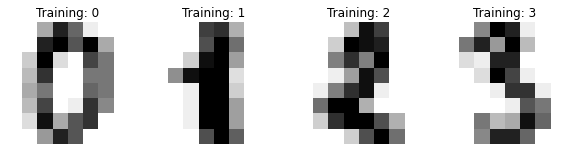

In [3]:
# Let's Visualize the dataset. Please read through and try to understand this code.
# Try removing parts and seeing what changes.
# This is a common exercise for a developer, grabbing working code and learning from it.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
# If you try to pass digits.images into a model, it wont work because it is 3 dimensional.
# Flatten the images such that they have rows (images) and columns (features)

In [5]:

x = digits.images.reshape(-1, 64)
y = digits.target

In [6]:
# Create a smaller dataset that is 10% of the original dataset, grabbing every 10th image.
xtrn, ytrn = x[::10], y[::10]

In [7]:
from sklearn.linear_model import Ridge

In [8]:
# Train a model on xtrn, ytrn and check the accuracy of the model.
classifier = Ridge().fit(xtrn, ytrn)
acc = (classifier.predict(xtrn).round() == ytrn).mean()
print('percent accuracy is ', acc.round(3))

percent accuracy is  0.311


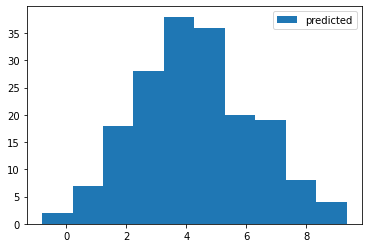

In [9]:
# Oh no! Our accuracy is pretty low.
# Lets visualize a histogram of our predictions to see how things are going

plt.hist(classifier.predict(xtrn), label = 'predicted')
plt.legend()

In [10]:
# That looks funny... we should be getting evenly distributed predictions for all the numbers.
# Why do we see that mound shape?

In [11]:
# Maybe let's look for a model that doesn't impose order, like logistic regression
# Logistic regression treats each number output as a completely independent possibility
# It doesnt assume 2 and 3 are similar, for instance

In [12]:
from sklearn.linear_model import LogisticRegression


C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([11., 16., 19., 27., 31., 22., 14., 15., 15., 10.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

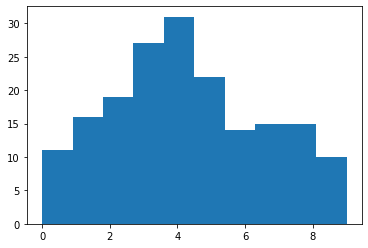

In [13]:
lrclassifier = LogisticRegression().fit(xtrn, ytrn)
plt.hist(lrclassifier.predict(xtrn))

In [14]:
# okay that's a little more reasonable. Now what about the accuracy?
(lrclassifier.predict(xtrn).round() == ytrn).mean()


1.0

In [15]:
# great! Our accuracy is 100%!

In [16]:
# Just to make sure, let's check our accuracy at predicting on the rest of the dataset.
(lrclassifier.predict(x).round() == y).mean()

0.9276572064552031

In [17]:
# Oh, shoot. it dropped slightly. Let's be a little more rigorous about this.
# When we split up the training data, let's take the data we didn't use, and form the rest into
# a "Validation" dataset, that we can use to test how well our model works.
# Lets do a 10% training, 90% validation split, because otherwise this problem is too easy

In [18]:
n_data = x.shape[0]
train_locations = list(range(0, n_data, 10))
val_locations = [d for d in range(n_data) if d not in train_locations]

xtrn, ytrn = x[train_locations], y[train_locations]
xval, yval = x[val_locations], y[val_locations]

In [24]:
# Now please train a model on the training set, make predictions on the validation set.
# And test the performance of the model
lrclassifier = LogisticRegression().fit(xtrn, ytrn)
yhat = lrclassifier.predict(xval)

C:\Users\leedt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
(yhat == yval).mean()

0.9196042053184911

In [26]:
# What can we do to improve the model?
# Use larger training datasets
# Try another model